In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [3]:
%ls

BdRuns-autapse.csv
BdRuns-autapse-randomizeJ.csv
BdRuns-autapse-thJ.csv
BdRuns.csv
lambdaVsSlope.png
LICENSE
parameters.csv
parametersRandomNet.csv
parametersRuns-autapse.csv
parametersRuns-autapse-randomizeJ.csv
parametersRuns-autapse-thJ.csv
parametersRuns.csv
parametersRunsRandomNet.csv
PlotData.ipynb
__pycache__/
README.md
Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv
turboBrainLambda.py
turboBrainLambda-ThJ.py
turboBrain.py
turboBrainUtils.py


In [4]:
df = pd.read_csv('parametersRuns.csv')
dfRand = pd.read_csv('parametersRandomNet.csv')

In [5]:
df

,alphaRuns,lambdas,run
0,1.382982,0.10,0
1,1.307409,0.10,1
2,1.251397,0.10,2
3,1.382982,0.10,3
4,NaN,0.10,4
...,...,...,...
795,1.431185,0.29,35
796,1.185731,0.29,36
797,1.429741,0.29,37
798,1.207664,0.29,38


0.1
[1.38298242 1.307409   1.25139688 1.38298242 1.38298242 1.41167195
 1.33739313 1.33739313 1.33739313 1.17613578 1.38298242 1.38665482
 1.33739313]
n 13
0.11
[1.34896967 1.36678712 1.22198922 1.33033301 1.66305236 1.73276948
 1.29033967 1.21766941 1.59122942 1.38017339 1.73276948 1.73276948
 1.08249698 1.19554237 1.66305236 1.31514599 1.73276948 1.36278115
 1.41562706 1.42823404]
n 20
0.12
[1.26383787 1.24894803 1.15454005 1.3805757  1.31605187 1.63487446
 1.73276948 1.66305236 1.40557957 1.05322537 1.2087418  1.28612356
 1.73276948 1.33200041 1.33773025 1.66305236 1.30849028 1.70470318
 1.26007753 1.66305236 1.28976452 1.73276948 1.0961907 ]
n 23
0.13
[1.78894407 1.20866463 1.35820713 1.47921274 1.36458572 1.39884846
 1.32118771 1.43752168 1.27366247 1.18749091 1.23363049 1.33861582
 1.51100361 1.57577997 1.58909825 1.46388216 1.2580965  1.399959
 1.62541704 1.33828868 1.58511573 1.48129068 1.30419779 1.53225985
 1.5867294  2.03632748 1.49518185 1.18157863 1.62541704 1.39970104]
n 

<IPython.core.display.Javascript object>


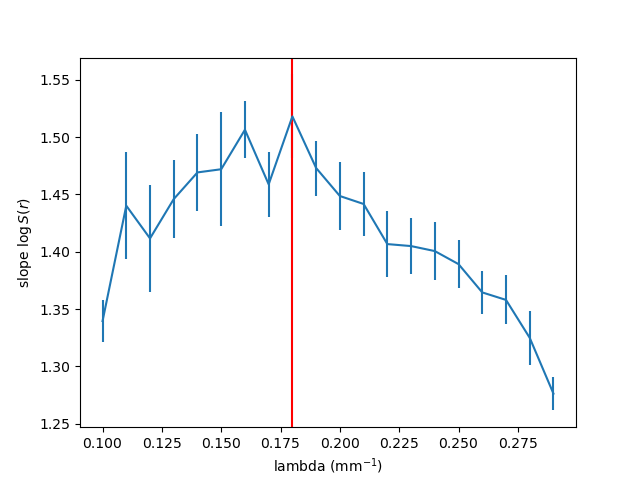

Text(0.5, 0, 'lambda (mm$^{-1}$)')

In [6]:
#plt.figure()
#plt.scatter(df['lambdas'].values,df['alphaRuns'].values)

lambdas = np.unique(df['lambdas'].values)

alphaMean = []
alphaSe = []
for lamd in lambdas:
    print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphas = df[df['lambdas'] == lamd]['alphaRuns'].values
    alphas = alphas[np.isfinite(alphas)]
    print(alphas)
    n = len(alphas)
    print('n',n)
    alphaMean.append(np.mean(alphas))
    alphaSe.append(stats.sem(alphas))
plt.figure()
plt.errorbar(lambdas, alphaMean, alphaSe)
plt.axvline(x = 0.18, color='r')
plt.ylabel('slope $\log S(r)$')
plt.xlabel('lambda (mm$^{-1}$)')

In [7]:
plt.savefig('lambdaVsSlope.png')

0.1
[1.38298242 1.307409   1.25139688 1.38298242 1.38298242 1.41167195
 1.33739313 1.33739313 1.33739313 1.17613578 1.38298242 1.38665482
 1.33739313]
n 13
0.11
[1.34896967 1.36678712 1.22198922 1.33033301 1.66305236 1.73276948
 1.29033967 1.21766941 1.59122942 1.38017339 1.73276948 1.73276948
 1.08249698 1.19554237 1.66305236 1.31514599 1.73276948 1.36278115
 1.41562706 1.42823404]
n 20
0.12
[1.26383787 1.24894803 1.15454005 1.3805757  1.31605187 1.63487446
 1.73276948 1.66305236 1.40557957 1.05322537 1.2087418  1.28612356
 1.73276948 1.33200041 1.33773025 1.66305236 1.30849028 1.70470318
 1.26007753 1.66305236 1.28976452 1.73276948 1.0961907 ]
n 23
0.13
[1.78894407 1.20866463 1.35820713 1.47921274 1.36458572 1.39884846
 1.32118771 1.43752168 1.27366247 1.18749091 1.23363049 1.33861582
 1.51100361 1.57577997 1.58909825 1.46388216 1.2580965  1.399959
 1.62541704 1.33828868 1.58511573 1.48129068 1.30419779 1.53225985
 1.5867294  2.03632748 1.49518185 1.18157863 1.62541704 1.39970104]
n 

/home/gosti/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gosti/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


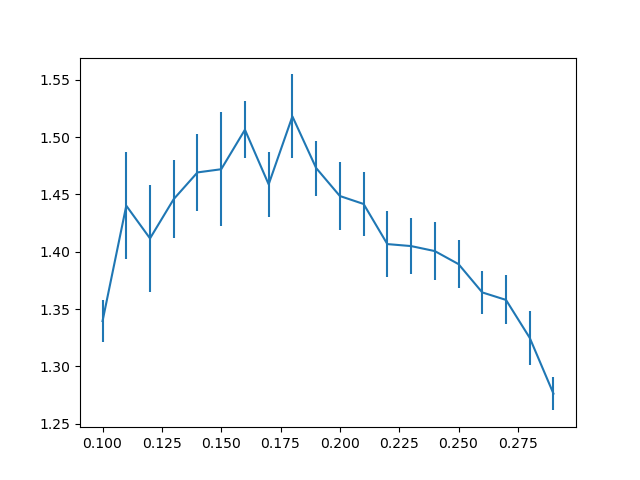

StopIteration: 

In [8]:
#plt.figure()
#plt.scatter(df['lambdas'].values,df['alphaRuns'].values)


lambdas = np.unique(df['lambdas'].values)

alphaMean = []
alphaSe = []
for lamd in lambdas:
    print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphas = df[df['lambdas'] == lamd]['alphaRuns'].values
    alphas = alphas[np.isfinite(alphas)]
    print(alphas)
    n = len(alphas)
    print('n',n)
    alphaMean.append(np.mean(alphas))
    alphaSe.append(stats.sem(alphas))

lambdasRand = np.unique(dfRand['lambdas'].values)

alphaMeanRand = []
alphaSeRand = []
for lamd in lambdasRand:
    print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphasRand = dfRand[dfRand['lambdas'] == lamd]['alphas'].values
    alphasRand = alphasRand[np.isfinite(alphasRand)]
    print(alphasRand)
    n = len(alphasRand)
    print('n',n)
    alphaMeanRand.append(np.mean(alphasRand))
    alphaSeRand.append(stats.sem(alphasRand))
    
plt.figure()
plt.errorbar(lambdas, alphaMean, alphaSe)
plt.errorbar(lambdasRand, alphaMeanRand, alphaSeRand)
plt.axvline(x = 0.18, color='r')
plt.ylabel('slope $\log S(r)$')
plt.xlabel('lambda (mm$^{-1}$)')

In [ ]:
%ls

In [ ]:
df = pd.read_csv('parametersRuns.csv')
dfBd = pd.read_csv('BdRuns.csv')

lambdas = np.unique(df['lambdas'].values)
print(lambdas)

f,axs = plt.subplots(1,5,figsize=(15,5))

BdName = list(dfBd.columns)[1:]

rs = dfBd['bins'].values

for i,lindx in enumerate(range(0,len(lambdas),4)):
    print(lindx,lambdas[lindx])
    #print(BdName[40*lindx:40*(lindx+1)])
    cols = BdName[40*lindx:40*(lindx+1)]
    Bds = dfBd[cols].values
    #print(rs.shape,Bds[:,0].shape)
    #plt.figure()
    for j in range(40):
        axs[i].set_title('lambda'+str(lambdas[lindx]))
        axs[i].scatter(rs,Bds[:,j])
        axs[i].loglog()



In [ ]:
dfBd['bins']

# Autapse

0.1
[1.38404477 1.3063021  1.70801556 1.21894316 1.30502708 1.21524109
 1.74113111 1.37051568 1.23616126 1.69456631 1.39469545 1.26780484
 1.56074724 1.3026991  1.29781278 1.30159604 1.27412979 1.73509254
 1.02381645 1.31125415 0.96449765 1.65162195 1.22248854 1.15537436
 1.40450712 1.31510267 1.47855904]
n 27
0.11
[1.43922631 1.28220928 1.43647291 1.22350372 1.27252139 1.44603858
 1.23411578 1.45432232 1.53130146 1.28466033 1.28000948 1.2372667
 1.34605152 1.12206406 1.20006806 1.65121545 1.57878581 1.37928857
 1.18904024 1.13924305 1.31354647 1.3683409  1.15618818 1.41559467
 1.47840247 1.24641315 1.40804331 1.06355917 1.26531016 1.11520926
 1.10702265 1.32949081 1.38080989]
n 33
0.12
[0.91600936 1.73855274 1.20607099 1.19007619 1.03614847 1.43728336
 1.64057707 1.28358166 1.07624838 1.20827219 1.77571625 1.34726328
 1.19127268 1.17191406 1.23707403 1.30683482 1.17697296 0.85334942
 1.07602594 1.28343991 1.22067429 1.28744367 1.55735129 1.25552284
 1.24340447 1.08936432 1.22099128 1.

<IPython.core.display.Javascript object>


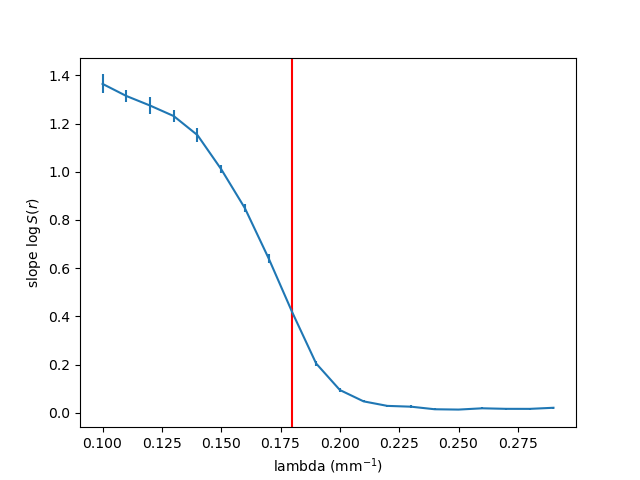

Text(0.5, 0, 'lambda (mm$^{-1}$)')

In [9]:
df = pd.read_csv('parametersRuns-autapse.csv')

lambdas = np.unique(df['lambdas'].values)

alphaMean = []
alphaSe = []
for lamd in lambdas:
    print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphas = df[df['lambdas'] == lamd]['alphaRuns'].values
    alphas = alphas[np.isfinite(alphas)]
    print(alphas)
    n = len(alphas)
    print('n',n)
    alphaMean.append(np.mean(alphas))
    alphaSe.append(stats.sem(alphas))
plt.figure()
plt.errorbar(lambdas, alphaMean, alphaSe)
plt.axvline(x = 0.18, color='r')
plt.ylabel('slope $\log S(r)$')
plt.xlabel('lambda (mm$^{-1}$)')

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29]


<IPython.core.display.Javascript object>


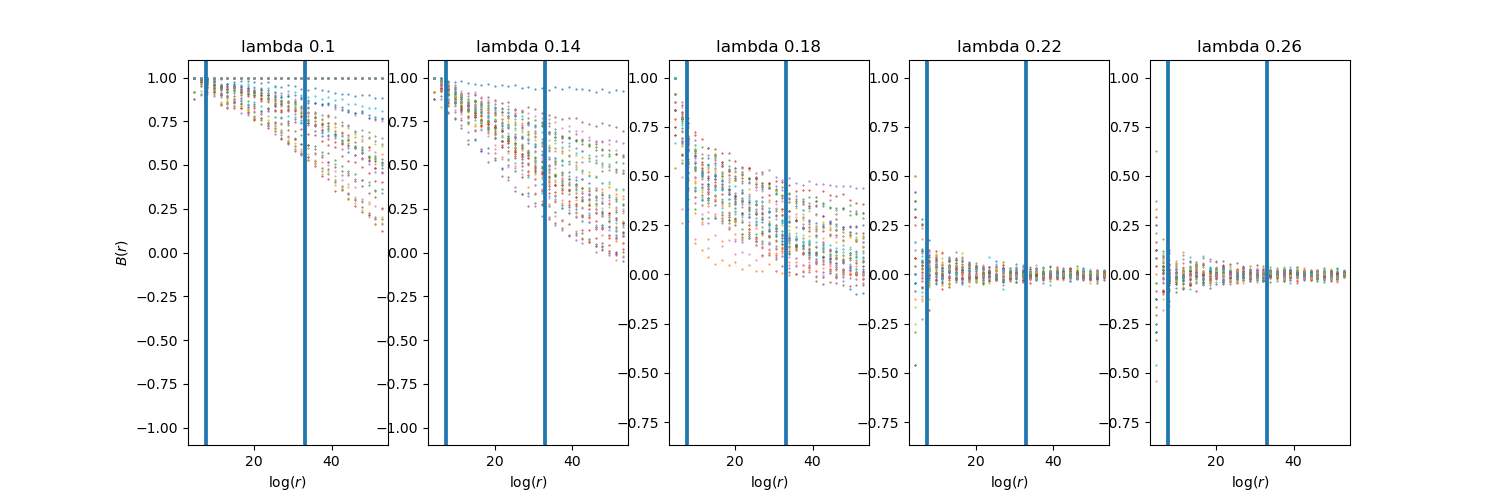

0 0.1
4 0.1399999999999999
8 0.1799999999999999
12 0.2199999999999999
16 0.2599999999999999


Text(0, 0.5, '$B(r)$')

In [10]:
df = pd.read_csv('parametersRuns-autapse.csv')
dfBd = pd.read_csv('BdRuns-autapse.csv')

lambdas = np.unique(df['lambdas'].values)
print(lambdas)

f,axs = plt.subplots(1,5,figsize=(15,5))

BdName = list(dfBd.columns)[1:]

rs = dfBd['bins'].values

for i,lindx in enumerate(range(0,len(lambdas),4)):
    print(lindx,lambdas[lindx])
    #print(BdName[40*lindx:40*(lindx+1)])
    cols = BdName[40*lindx:40*(lindx+1)]
    Bds = dfBd[cols].values
    #print(rs.shape,Bds[:,0].shape)
    #plt.figure()
    for j in range(40):
        axs[i].set_title('lambda '+str(np.round(lambdas[lindx],2)))
        axs[i].scatter(rs,Bds[:,j],s=0.2)
        axs[i].axvline(np.exp(2))
        axs[i].axvline(np.exp(3.5))
        axs[i].set_xlim((np.exp(1),np.exp(4)))
        axs[i].set_xlabel(r'$\log(r)$')
axs[0].set_ylabel(r'$B(r)$')

/home/gosti/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gosti/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/gosti/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/gosti/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/gosti/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<IPython.core.display.Javascript object>


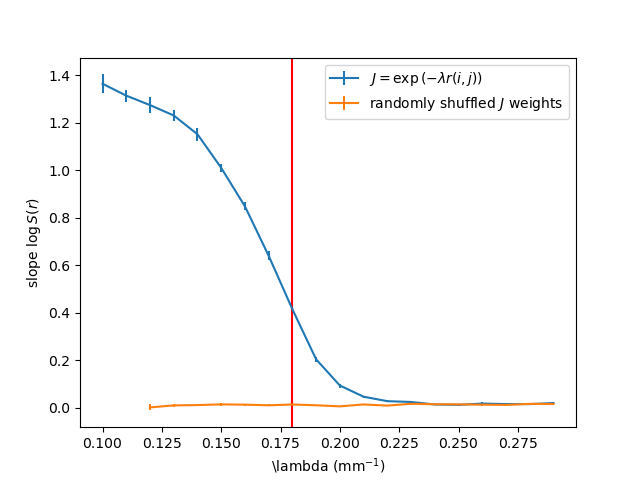

In [11]:
df = pd.read_csv('parametersRuns-autapse.csv')
dfRand = pd.read_csv('parametersRuns-autapse-randomizeJ.csv')

lambdas = np.unique(df['lambdas'].values)

alphaMean = []
alphaSe = []
for lamd in lambdas:
    #print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphas = df[df['lambdas'] == lamd]['alphaRuns'].values
    alphas = alphas[np.isfinite(alphas)]
    #print(alphas)
    n = len(alphas)
    #print('n',n)
    alphaMean.append(np.mean(alphas))
    alphaSe.append(stats.sem(alphas))

lambdasRand = np.unique(dfRand['lambdas'].values)

alphaMeanRand = []
alphaSeRand = []
for lamd in lambdasRand:
    #print(lamd)
    #print(df[df['lambdas'] == lamd]['alphaRuns'])
    alphasRand = dfRand[dfRand['lambdas'] == lamd]['alphaRuns'].values
    alphasRand = alphasRand[np.isfinite(alphasRand)]
    #print(alphasRand)
    n = len(alphasRand)
    #print('n',n)
    alphaMeanRand.append(np.mean(alphasRand))
    alphaSeRand.append(stats.sem(alphasRand))
    
plt.figure()
plt.errorbar(lambdas, alphaMean, alphaSe,label=r'$J=\exp{(-\lambda r(i,j))}$')
plt.errorbar(lambdasRand, alphaMeanRand, alphaSeRand, label=r'randomly shuffled $J$ weights')
plt.axvline(x = 0.18, color='r')
plt.ylabel('slope $\log S(r)$')
plt.xlabel('\lambda (mm$^{-1}$)')
plt.legend()

<IPython.core.display.Javascript object>


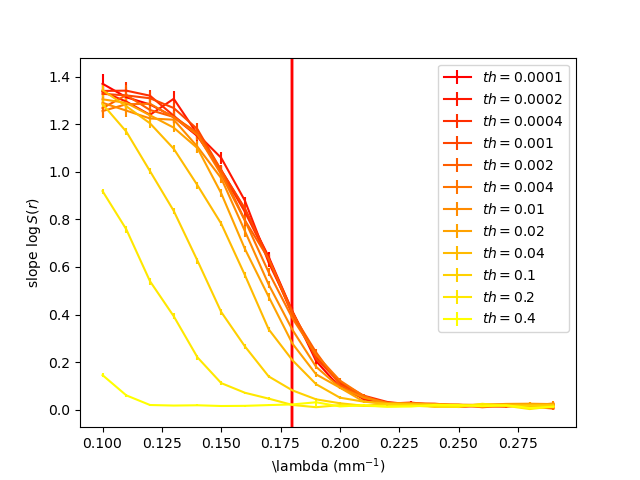

In [5]:
df = pd.read_csv('parametersRuns-autapse-thJ.csv')


ths = np.unique(df['thsRuns'].values)

plt.figure()
mycols= plt.cm.autumn(np.linspace(0,1,len(ths)))

for i,th in enumerate(ths):
    #print(th)
    #print(df[df['thsRuns']==th])
    dfTh = df[df['thsRuns']==th]
    lambdas = np.unique(dfTh['lambdas'].values)
    alphaMean = []
    alphaSe = []
    for lamd in lambdas:
        #print(lamd)
        #print(df[df['lambdas'] == lamd]['alphaRuns'])
        alphas = dfTh[dfTh['lambdas'] == lamd]['alphaRuns'].values
        alphas = alphas[np.isfinite(alphas)]
        #print(alphas)
        n = len(alphas)
        #print('n',n)
        alphaMean.append(np.mean(alphas))
        alphaSe.append(stats.sem(alphas))

    plt.errorbar(lambdas, alphaMean, alphaSe,label=r'$th=$'+str(th), color=mycols[i])
    #plt.errorbar(lambdasRand, alphaMeanRand, alphaSeRand, label=r'randomly shuffled $J$ weights')
    plt.axvline(x = 0.18, color='r')
    plt.ylabel('slope $\log S(r)$')
    plt.xlabel('\lambda (mm$^{-1}$)')
    plt.legend()

In [13]:
%ls

BdRuns-autapse.csv
BdRuns-autapse-randomizeJ.csv
BdRuns-autapse-thJ.csv
BdRuns.csv
lambdaVsSlope.png
LICENSE
parameters.csv
parametersRandomNet.csv
parametersRuns-autapse.csv
parametersRuns-autapse-randomizeJ.csv
parametersRuns-autapse-thJ.csv
parametersRuns.csv
parametersRunsRandomNet.csv
PlotData.ipynb
__pycache__/
README.md
Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv
turboBrainLambda.py
turboBrainLambda-ThJ.py
turboBrain.py
turboBrainUtils.py


In [14]:
import turboBrainUtils as tb 
from scipy.spatial import distance

time ij list 5.369693994522095


<IPython.core.display.Javascript object>


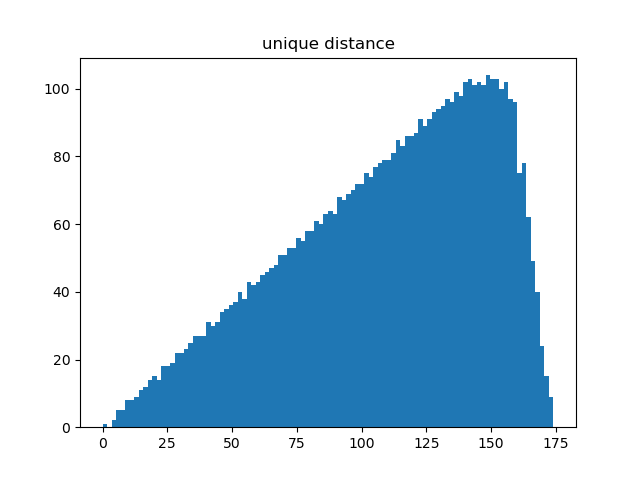

<IPython.core.display.Javascript object>


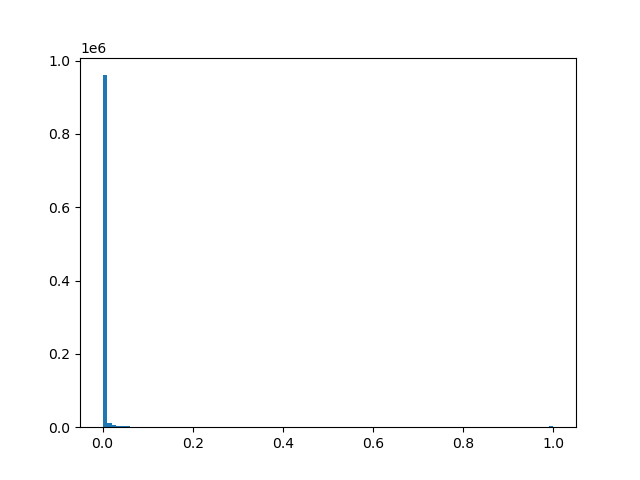

<IPython.core.display.Javascript object>


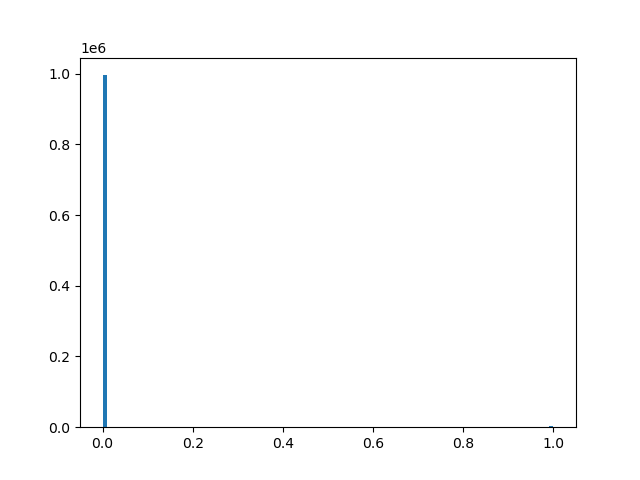

(array([9.95486e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.62000e+02, 2.10000e+02, 3.24000e+02, 5.00000e+01, 0.00000e+00,
        0.00000e+00, 2.68000e+02, 1.08000e+02, 4.40000e+01, 0.00000e+00,
        8.60000e+01, 0.00000e+00, 9.20000e+01, 1.04000e+02, 0.00000e+00,
        0.00000e+00, 2.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.40000e+01, 0.00000e+00, 0.00000e+00, 1.60000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

In [15]:
df = pd.read_csv('Schaefer2018_1000Parcels_17Networks_order_FSLMNI152_2mm.Centroid_RAS.csv')
df.head()
X = df['R']
Y = df['A']
Z = df['S']
N=len(X)
autapse = True
randomize = True

coords = np.array([X,Y,Z]).T
dist = distance.cdist(coords, coords, 'euclidean')
uniqDist,iListList,jListList = tb.sortIJbyDist(dist,N)
plt.figure()
h,bins,f=plt.hist(uniqDist,bins=100)
plt.title('unique distance')

lamda = 0.18#0.18
J = tb.makeJ(dist,lamda,autapse,randomize)

plt.figure()
plt.hist(J.flatten(),bins=100)

J[J<0.2]=0

plt.figure()
plt.hist(J.flatten(),bins=100)